In [ ]:
import torch

In [ ]:
x = torch.rand(5, 3)
x

tensor([[2.3890e-04, 3.7401e-01, 8.5475e-01],
        [4.8538e-02, 3.1506e-02, 1.3080e-01],
        [8.9706e-01, 6.8121e-01, 9.6349e-01],
        [1.6447e-01, 2.7413e-01, 8.6185e-01],
        [9.9327e-01, 2.5573e-01, 7.9038e-01]])

In [ ]:
tensor_0d = torch.tensor(1.)
tensor_1d = torch.tensor([1, 2, 3])
tensor_2d = torch.tensor([[1, 2],
                          [3, 4]])
tensor_3d = torch.tensor([[[1, 2], [3, 4]],
                           [[5, 6], [7, 8]]])

In [ ]:
tensor_0d.dtype

torch.float32

In [ ]:
tensor_3d.shape

torch.Size([2, 2, 2])

In [ ]:
x = tensor_3d.reshape(2, 4)
print(x.shape)
x

torch.Size([2, 4])


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [ ]:
y = tensor_3d.view(2, 4)
print(y.shape)
y

torch.Size([2, 4])


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

разница между shape и view то что первая не делает копию данных а вторая делает или наоборот))

In [ ]:
tensor_2d.T

tensor([[1, 3],
        [2, 4]])

---
y = w * x + b

y -- target

x -- вектор измерений

w -- wieght

b -- отклонение

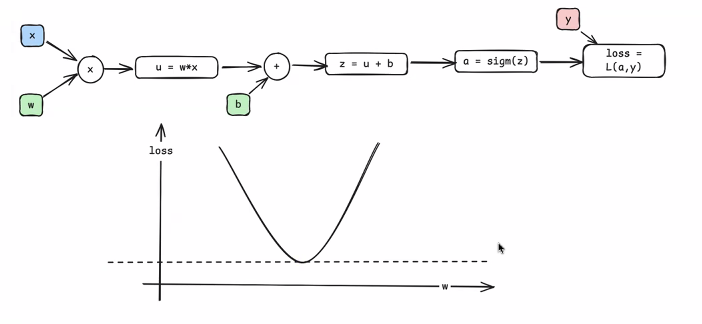

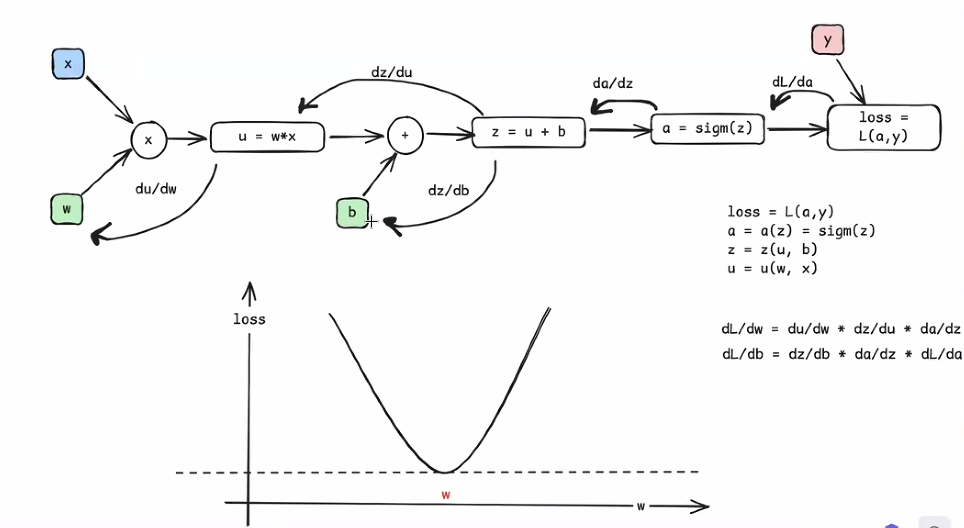

In [ ]:
import torch.nn.functional as F
from torch.autograd import grad

In [ ]:
y = torch.tensor([1.0])
x = torch.tensor([1.1], requires_grad=True)
w = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = w * x + b
a  = torch.sigmoid(z)
loss = F.binary_cross_entropy(a, y)
loss

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
grad_L_w = grad(loss, w, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w, grad_L_w)

(tensor([-0.0898]),) (tensor([-0.0898]),)


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


---

In [ ]:
import torch.nn as nn

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()

    self.layers = nn.Sequential(
        # 1st layer(input)
        nn.Linear(num_inputs, 10),
        nn.ReLU(),

        # 2nd layer(hidden)
        nn.Linear(10, 10),
        nn.ReLU(),

        # 3rd layer(output)
        nn.Linear(10, num_outputs),
    )

  def forward(self, x):
    return self.layers(x)




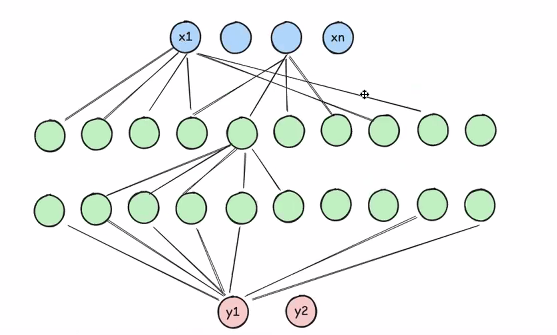

In [ ]:
torch.manual_seed(42)

model = NeuralNetwork(4, 2)
print(model.layers[0].weight)
params = [p for p in model.parameters()]
params

In [ ]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
num_params

182

---

In [ ]:
model = NeuralNetwork(4, 2)
x = torch.rand((1, 4))
out = model(x)
out

tensor([[-0.2862,  0.0090]], grad_fn=<AddmmBackward0>)

In [ ]:
X_train = torch.tensor([
    [-1.0, 3.4],
    [-1.5, 2.4],
    [-5.5, 1.1],
    [2.0, -1.4],
    [4.0, -2.4]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
  [-0.3, 2.5],
  [1.0, -2.0]
])

y_test = torch.tensor([0, 1])

In [ ]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.features = X
    self.labels = y
  def __getitem__(self, index):
    x = self.features[index]
    y = self.labels[index]
    return x, y
  def __len__(self):
    return len(self.features)

In [ ]:
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

5
2


In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=2, shuffle=True, num_workers=0
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=2, shuffle=True, num_workers=0
)

In [ ]:
for (idx, (x, y)) in enumerate(train_dataloader):
  print(f'Batch: #{idx}, \nx: {x}, \ny: {y}')

Batch: #0, 
x: tensor([[-1.5000,  2.4000],
        [ 2.0000, -1.4000]]), 
y: tensor([0, 1])
Batch: #1, 
x: tensor([[ 4.0000, -2.4000],
        [-5.5000,  1.1000]]), 
y: tensor([1, 0])
Batch: #2, 
x: tensor([[-1.0000,  3.4000]]), 
y: tensor([0])


In [ ]:
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs = 10
for epoch in range(num_epochs):
  model.train()

  for (idx, (x, y)) in enumerate(train_dataloader):
    model_result = model(x)
    loss = F.cross_entropy(model_result, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.zero()

AttributeError: 'SGD' object has no attribute 'zero'